# Kapittel 15

In [10]:
% OverflateSvampen.m

% Skript som brukar trapesmetoden til å rekne ut overflata
% av eit vasstårn ut frå ein gitt modell for profilen

% Grenser (høgda)
a=0;b=60;

% Profil på tårn
R=@(x) 5+4./(1+exp((35-x)/1.5)).*(sqrt(abs(x))-sqrt(30)).^2;
% Derivert
dx=1e-3;
Rd=@(x) (R(x+dx)-R(x-dx))/(2*dx);
% Integrand
f=@(x) R(x).*sqrt(1+Rd(x).^2);


% Oppdeling
%n=input('Gi oppdelinga n: ');
n=10
h=(b-a)/n;                  % Steglengda

% Bidrag frå endane
T=h/2*(f(a)+f(b));

% Resten av bidraga
for i=1:(n-1)
    xi=a+i*h;
    T=T+h*f(xi);
end

% Skriv overflata til skjerm
Overflate=2*pi*T


n = 10

Overflate = 4.0967e+03

N = 10

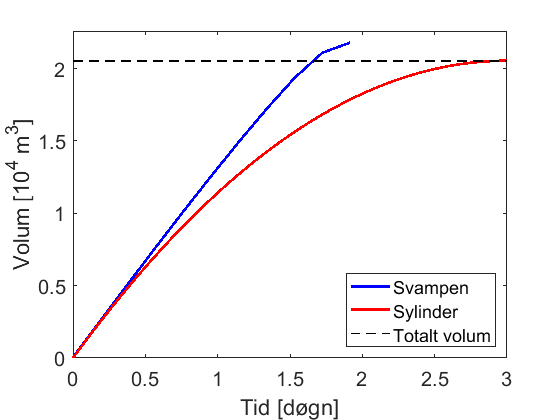

In [11]:
% PlottVassforbruk.m

% Skript som reknar ut vassforbruket som funksjon av tid for ein
% tank som blir tømd. 
% Profilen til tanken er gitt ved R(x) under.
% Vi tar utgongspunkt i Torrichellis lov, V'(t) = -k sqrt(h), for
% å bestemme høgda som funksjona av tid, som vi i sin tur brukar
% til å bestemme volumet av det som har runne ut ved integrasjon.

% Startkrav:
t0=0;
tf=1.9160;
h0=60;
t=t0; h=h0; Volum=0;

% Parametrar
Vtot=2.0547e+04;
% Konstanten k:
k=2*Vtot/(3*sqrt(h0));

% Profil-funksjon
R=@(x) 5+4/(1+exp((35-x)/1.5))*(sqrt(x)-sqrt(30))^2;
% Høgresida i differensaillikninga h'=F(h)
F=@(x) -k*sqrt(x)/(pi*R(x)^2);

% Oppdeling i Eulers-metode og Riemann-integrasjon
%N=input('Oppdelinga: ');
N=10
dt=(tf-t0)/N;

% Vektorar til plotting
tVektor=t0:dt:tf;
hVektor=zeros(1,N+1); hVektor(1)=h0;
VolumVektor=zeros(1,N+1); VolumVektor(1)=h0;

for n=1:N
  h=h+F(h)*dt;                  % Eulers meotde
  hVektor(n+1)=h;
  Volum=Volum+k*sqrt(h)*dt;     % Oppdaterar volum ved eit Riemann-integral
  VolumVektor(n+1)=Volum;
end

% Plottar resultatet
plot(tVektor,real(VolumVektor)/1e4,'b-','linewidth',2)


% Plottar tilsvarende funksjon for sylindertårnet
H=60;                           % Høgde
% Funksjon for vasshøgda i sylindertårn
SylFunk=@(t) (sqrt(H)-k*H/2/Vtot*t).^2;
xx=0:1e-2:3;                    % Tids-vektor
hold on
% Volum: Høgd gange grunnflate, grunnflata er totalvolum delt å høgda
plot(xx,(Vtot-SylFunk(xx)*Vtot/H)/1e4,'r-','linewidth',2)

% Linje som markerar totalvolumet
plot([0 3], [Vtot Vtot]/1e4, 'k--','linewidth',1.2)
% Forklarar grafane
legend('Svampen','Sylinder','Totalt volum','location','southeast')
% Tekst på aksane
xlabel('Tid [døgn]'); ylabel('Volum [10^4 m^3]')
% Justerar aksane
axis([0 3 0 1.1*Vtot/1e4])
% Justerar skriftstorleiken
set(gca,'fontsize',15)
hold off



In [12]:
% ToemmeTank.m

% Skript som bestemmer kor lang tid det å tømme ein tank.
% Profilen til tanken er gitt ved R(x) under.
% Vi tar utgangspunkt i Torricellis lov, V'(t) = -k sqrt(h).

% Startkrav:
t0=0;
h0=60;
t=t0; h=h0;

% Parametrar
Vtot=2.0547e+04;
k=2*Vtot/(3*sqrt(h0));

% Profilfunksjon
R=@(x) 5+4./(1+exp((35-x)/1.5)).*(sqrt(x)-sqrt(30)).^2;
% Høgresida i differensiallikninga
F=@(x) -k*sqrt(x)./(pi*R(x).^2);

% Steglengde
%dt=input('Steglengda i tid: ');
dt=0.5

while h>0
  h=h+F(h)*dt;       % Eulers metode
  t=t+dt;
end

% Skriv slutttida til skjerm
t


dt = 0.5000

t = 2.5000

In [13]:
% VolumSvampen.m

% Skript som brukar trapesmetoden til å rekne ut volumet
% av eit vasstårn ut frå ein gitt modell for profilen

% Grenser (høgda)
a=0;b=60;

% Profil på tårn
R=@(x) 5+4./(1+exp((35-x)/1.5)).*(sqrt(x)-sqrt(30)).^2;
% Integrand
f=@(x) R(x).^2;

% Oppdeling
%n=input('Gi oppdelinga n: ');
n=10
h=(b-a)/n;                  % Steglengda

% Bidrag frå endane
T=h/2*(f(a)+f(b));

% Resten av bidraga
for i=1:(n-1)
    xi=a+i*h;
    T=T+h*f(xi);
end

% Skriv volumet til skjerm
Volum=pi*T


n = 10

Volum = 2.1108e+04